# Juptyer Notebook - The Outliers

## [View on Github](https://github.com/edgeslab/cs418-project-the-outliers/blob/master/spotify-analysis/SpotifyAnalysisProgressReport.ipynb)

## Authors

Siham Hussein: shusse6@uic.edu, seehamrun@

Fatima Qarni: fqarni2@uic.edu, qarni@

Zaynab Almoujahed: zalmou2@uic.edu, zalmoujahed@ 

Amit Panthi: apanth2@uic.edu, apanth2@

David Qiao: dqiao4@uic.edu, chowsterr@


## Project Overview and Introduction

Music is a very impactful media and can affect our daily lives. It invokes many different senses, emotions and is key to human growth. However, not every song is created equal, different situations call for different soundtracks. 

The goal of the project is to create an Spotify playlist analyzer. We  will analyze Spotify's top ranking playlists and see what musical qualities are most prevalent. It should be able both see the trends amongst different playlists over the years and across countries, and also be able to predict which year/country a user's playlist is closest to.

## Changes

Originally we thought we would make a playlist generator, but after having worked on the project thus far, we thought it would be best to focus on making the project analyze playlists instead, starting with our gathered playlists, and ultimately being able to analyze any user's playlists.

## Data Overview 

Spotify provides us with playlists that contain the top tracks of the year (auto or user generated) per time period/region. Along with this, Spotify also keeps a number of stats pertaining to each song (danceability, loudness, energy, etc). Concatenating these stats will be the basis of our study.

### Data Sources 

We used the spotify API to gather information about the top 50 playlists from 60+ countries as well as gather playlists for the yearly top hits from various years (globally). 

## Data Cleaning

We obtained the data via the Spotify Web API. This is based off OAuth2 to make validated requests and then we used several endpoints to get the information about the playlist tracks. 

Obtaining a playlist involved 3 steps: 
1. Obtaining a request token
2. Finding the playlist ID of the playlists we were interested in via the spotify web application
3. Use the spotify API to obtain the overall Playlist Object (`main.get_playlist()`)
4. Parse the Playlist Object to get the tracks in the playlist out of it and potentially retrieve more tracks if the playlist is large (`main.get_playlist_tracks`)
5. For each track from the above, call the Spotify API to obtain the "track features" (`main.get_audio_features`)

These steps are wrapped into one function `main.get_playlist_audio_features()` which takes the playlist ID and an access token (populated from `main.get_access_token()`) and returns a list of those features which are then written to a CSV file using `main.export_to_csv`


## Exploratory Data Analysis

<u> __Structure__ </u>: The data we have is structured around the audio features of each track. For each track we can obtain the following object:

```
{
  "duration_ms" : 255349,
  "key" : 5,
  "mode" : 0,
  "time_signature" : 4,
  "acousticness" : 0.514,
  "danceability" : 0.735,
  "energy" : 0.578,
  "instrumentalness" : 0.0902,
  "liveness" : 0.159,
  "loudness" : -11.840,
  "speechiness" : 0.0461,
  "valence" : 0.624,
  "tempo" : 98.002,
  "id" : "06AKEBrKUckW0KREUWRnvT",
  "uri" : "spotify:track:06AKEBrKUckW0KREUWRnvT",
  "track_href" : "https://api.spotify.com/v1/tracks/06AKEBrKUckW0KREUWRnvT",
  "analysis_url" : "https://api.spotify.com/v1/audio-analysis/06AKEBrKUckW0KREUWRnvT",
  "type" : "audio_features"
}
```

This data tells us the different features of a track that we can use to perform categorization later on. Given a playlist, we have written several API Access functions that will retrieve these audio features for all of the tracks on the playlist.

<u> __Scope__ </u>: Spotify has several thousands of playlists that are automatically generated and even more user created ones. We are limiting the scope of this project to just obtaining tracks for "Top Hits" for different countries and tracks for Spotify's "Yearly Hits" playlists. The yearly hits are global hits for each different year that we have data for.

<u> __Granularity__ </u>: The data we have available is on a per-track granularity. While we do have the data grouped by countries and years, the underlying csvs all contain the same information per track. We can obtain more data about the individual song such as it's [audio analysis](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/) but that is out of scope for now.

<u> __Temporality__</u>: The data is about each individual track, as the underlying spotify api learns, some of these values may change, but that is really only for newer songs. Older song features are not expected to change much. The only sense of "time" that we have is when a track was first introduced. There are no specific "timestamps" in the data

<u> __Faithfulness__</u>: According to PTDS, We describe a dataset as "faithful" if we believe it accurately captures reality. The data that we are looking at consists of a score from 0-1 of various musical features. None of these values are entered manually or have other dependencies, rather these are provided by Spotify from their internal heuristics and analysis tools, so we believe this data is as faithful as we can get.

<u> __Hypothesis__</u>: We started off comparing general trends of features across countries, but that proved very boring since we we were focusing on just two specific terms and it wasn't providing any meaningful insights, however when you look at how features correlate with each other, there were some obvious trends country-wide. More explanations are below each plot.

In [1]:
import visualization

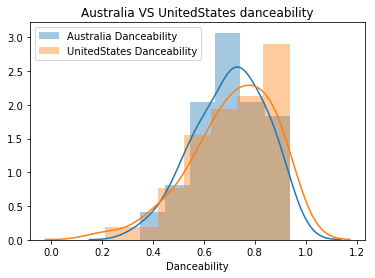

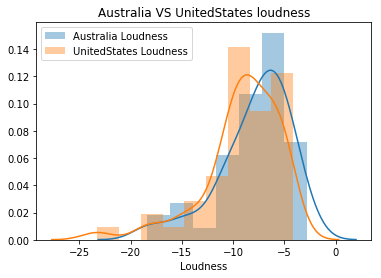

In [7]:
visualization.makeDanceabilityBarPlot("Australia", "UnitedStates")
visualization.makeLoudnessBarplot("Australia", "UnitedStates")

### Hypothesis (continued)

The individual data we saw comparing two countries wasn't really interesting, so we took a dive into trying to find some trends looking at the data as a whole. For example, how does loudness compare across ALL countries? From the below we see that most countries like music loud.

![image](images/loudness_country.png)

In [ ]:
visualization.make_country_barplot("loudness")

When plotting loudness vs danceability, across the years we saw some years stand out more than others.

Of the data that we have, the 1920's appear to have similar "loudness" regardless if their dancability score goes up. (we know this image is hard to read, so we cleared the output of the cell below and included the saved image)

![image](images/danceability_vs_loudness_yearly.png)

In [ ]:
visualization.create_yearly_features_dotplot("danceability", "loudness")

### Loudness and Danceabilities per country 

When comparing the country data for loudness and danceablitly, we see less obviousness in the trends. The plots for the different countries are kind of all over the place and its not really interesting.

### Energy and Loudness per country 

We see that there is a slight trend where the louder a song is, the more energy it has this is not unique to countries though

In [ ]:
# all of the countries is a little bit distracting, lets look at just a select few: 
visualization.create_country_features_dotplot("loudness", "danceability", ["UnitedStates", "Spain", "Sweden", "NewZealand", "Turkey"])
visualization.create_country_features_dotplot("energy", "loudness", ["UnitedStates", "Spain", "Sweden", "NewZealand", "Turkey"])

![image](images/loudness_vs_danceability_country.png)
![image](images/energy_vs_loudness_country.png)



### Speechiness vs Instrumentalness per country 

This plot was intersting because for the most part, instrumentalness scores were low regardless of speechiness - they are all clustered around the lower part of the Y line except for some outliers from the UnitedStates. 

In [ ]:
visualization.create_country_features_dotplot("speechiness", "instrumentalness", ["UnitedStates", "Spain", "Sweden", "NewZealand", "Turkey"])


![image](images/speechiness_vs_instrumentalness_country.png)

## Machine Learning Analysis

In [2]:
import classification

all_res, year = classification.predictYear('2018TopTracks')
print("The predicted year for the 2018 Top Tracks Playlist was: " + str(year))

The predicted year for the 2018 Top Tracks Playlist was: 1970


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


We created a classfier to predict the year most of the songs in a playlist were popular in.
We chose a playlist of 2018 top tracks, and the predicted year was 1970. 

Clearly, we need some more training data to make our predictions more accurate.

## Reflection 

The hardest part of this project has been collecting enough data to provide a good ML model. We have to have groups of songs that are significant and unique enough for the classifier to learn from. We started with country data but that is limited to roughly 50-100 songs per country (we are trying to find more playlists). In addition to this, it also contains repeativite hits. For example multiple hits are popular in more than one country so classifying based on which country a song is popular in is difficult because there are multiple labels per track. We are working on finding out exactly how many tracks this applies to.

Yearly data is a little bit easier as we have few overlaps in classifications(fewer tracks are present in multiple years). In terms of visualization of the data we have seen some interesting trends amongst the different values for songs such as danceability and loudness.

Our goals for the project are to provide an insight into the way spotify classifies what makes a song "popular" based on its audio features and being able to predict how popular a song with these features will be. While we aren't there yet, we believe the yearly classifications will lead us to this and a lot of the work we will be doing to create a ML model to predict the year a song is popular in will be reused to predict its "popularity" score by the end of the semester.

## Next steps

Our next steps are to provide the user with a way to interact with this data and with the Machine Learning models we have put together. Some ideas are below: 

* Create a WebApplication using AppEngine that allows the user to enter their playlist and we "score" their content based on what is popular at the time.
* Allow the user to enter a song track and we will predict which year or country it came from.
* Have users submit user-generated playlists, where a rating system would be generated to see which countries / time periods that playlist would be popular in.